In [ ]:
import pandas as pd
import re
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from matplotlib import pyplot as plt
from tqdm import tqdm

import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.metrics import pairwise_distances
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_curve, auc,precision_recall_curve
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import TfidfVectorizer


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 13.7 MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
from google.colab import drive
drive.mount('drive')

Drive already mounted at drive; to attempt to forcibly remount, call drive.mount("drive", force_remount=True).


In [ ]:
df_new = pd.read_excel('/content/drive/MyDrive/AAPL_NEWS_FINAL.xlsx') 

In [ ]:
df_new.set_index('first_created_DAY').sort_index()

n_row, n_col = df_new.shape

df_new = df_new.dropna()
sub_df = df_new[df_new['body'].str.contains('Click')]
rows_to_keep = list(sub_df['item_id'])

df_new = df_new[~df_new['item_id'].isin(rows_to_keep)]
df = df_new.set_index('first_created_DAY')

,Unnamed: 0,item_id,first_created,version_created,headline,body,DAY_OF_WEEK
first_created_DAY,,,,,,,
2010-01-03,62803,15671018,2010-01-03 13:00:06.000,2010-01-03 13:00:06.000,RPT-ANALYSIS-Amazon could pay for Kindle sales...,* Amazon takes risk giving good Kindle new...,Sunday
2010-01-04,62810,15676672,2010-01-04 22:54:00.000,2010-01-04 22:54:00.000,PREVIEW-Wall Street cool on rumored Google pho...,* Analysts do not expect revenue boost fro...,Monday
2010-01-04,62624,15675282,2010-01-04 19:40:32.000,2010-01-04 19:40:32.000,"TAKE A LOOK-CES-Phones, PCs seen as prime tech...",As technology companies make their annual ...,Monday
2010-01-04,62623,15673119,2010-01-04 11:29:57.000,2010-01-04 11:29:57.000,UPDATE 1-Nokia to sell over 500 mln phones in ...,* Nokia to sell more than 500 mln phones i...,Monday
2010-01-04,62622,15672897,2010-01-04 10:22:21.000,2010-01-04 10:22:21.000,Mobile operating systems market too crowded -N...,"HELSINKI, Jan 4 (Reuters) - Top cellphone ...",Monday
...,...,...,...,...,...,...,...
2022-09-30,46843,49245989,2022-09-30 12:43:35.151,2022-09-30 13:42:09.841,Refinitiv Newscasts - The Week in Numbers: ana...,\nClick the following link to watch video: htt...,Friday
2022-09-30,46844,49246003,2022-09-30 12:43:35.151,2022-09-30 13:43:44.292,Refinitiv Newscasts - The Week in Numbers: ana...,\nClick the following link to watch video: htt...,Friday
2022-09-30,46845,49246005,2022-09-30 12:43:35.151,2022-09-30 13:43:49.868,Refinitiv Newscasts - The Week in Numbers: ana...,\nClick the following link to watch video: htt...,Friday


In [ ]:
df.head(2)

,Unnamed: 0,item_id,first_created,version_created,headline,body,DAY_OF_WEEK
first_created_DAY,,,,,,,
2021-01-29,0,37555701,2021-01-29 16:50:43,2021-01-29 16:50:43,"EU lawmakers, Amazon, Apple, Facebook, Google ...","By Foo Yun Chee\n BRUSSELS, Jan 29 (Reu...",Friday
2021-01-29,2,37555782,2021-01-29 17:02:08,2021-01-29 17:02:08,"UPDATE 1-GameStop third biggest short, even as...","(Adds details, comments)\n NEW YORK, Jan 2...",Friday


In [ ]:
nlp = spacy.load("en_core_web_sm")
nltk.download('punkt')
nltk.download('stopwords')  

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def to_sents(body):
  k = re.sub('\n','',body)
  x = []
  for i in k.split('  '):
    if len(i) > 1:
      x.append(i.strip())
  return x

In [ ]:
def get_summary(tf_idf, sents, topN = 1):
    
   #add your codes
    similarity = 1 - pairwise_distances(tf_idf, metric = 'cosine')
    average_score = []
    for x in similarity:
      score = sum(x)/len(x)
      average_score.append(score)

    #average_score
    test = average_score.copy()
    test.sort(reverse = True)
    top_n = test[:topN]
    k = []
    for x in top_n:
      idx = average_score.index(x)
      k.append(idx)   

    summary = []
    for i in k:
      summary.append(sents[i])

    return summary, test[:topN] 

In [ ]:
def body_score(summary, weight):
  res = 0
  score_sum = sum(weight)
  sid = SentimentIntensityAnalyzer()

  for i in range(len(summary)):
    sentiment = sid.polarity_scores(summary[i])
    k = sentiment['compound']*(weight[i]/score_sum)
    res += k
  return res

In [ ]:
def cal_body_score(body):
  sents = to_sents(body)
  
  tfidf_vect = TfidfVectorizer()
  dtm= tfidf_vect.fit_transform(sents)
  matrix = dtm.toarray()

  lens = len(sents)
  if lens >= 5:
    N = 5
  else:
    N = lens

  summary, weight = get_summary(matrix, sents, topN = N)
  score = body_score(summary, weight)

  return score

In [ ]:
body_scores = []
for i in tqdm(range(df.shape[0])):
  try:
    s = cal_body_score(df['body'][i])
    body_scores.append(s)
  except Exception as e:
    print(i)
    print(e)

100%|██████████| 63550/63550 [14:38<00:00, 72.36it/s]


In [ ]:
vader_headline_scores = []
sid = SentimentIntensityAnalyzer()
for i in tqdm(range(df.shape[0])):
  try:
    s = sid.polarity_scores(df['headline'][i])
    vader_headline_scores.append(s['compound'])
  except Exception as e:
    print(i)
    print(e)

100%|██████████| 63550/63550 [00:03<00:00, 15995.16it/s]


In [ ]:
df['vader_headline_scores'] = vader_headline_scores
df['body_scores'] = body_scores

In [ ]:
df.sort_index()

,Unnamed: 0,item_id,first_created,version_created,headline,body,DAY_OF_WEEK,vader_headline_scores,body_scores
first_created_DAY,,,,,,,,,
2010-01-03,62803,15671018,2010-01-03 13:00:06,2010-01-03 13:00:06,RPT-ANALYSIS-Amazon could pay for Kindle sales...,* Amazon takes risk giving good Kindle new...,Sunday,-0.1027,0.345039
2010-01-04,62805,15675439,2010-01-04 20:20:18,2010-01-04 20:20:40,"CES-Tech showcase looks to regain ""wow"" factor",* CES keynotes start on Jan 6; show runs f...,Monday,0.5859,0.034621
2010-01-04,62623,15673119,2010-01-04 11:29:57,2010-01-04 11:29:57,UPDATE 1-Nokia to sell over 500 mln phones in ...,* Nokia to sell more than 500 mln phones i...,Monday,0.0000,0.104057
2010-01-04,62624,15675282,2010-01-04 19:40:32,2010-01-04 19:40:32,"TAKE A LOOK-CES-Phones, PCs seen as prime tech...",As technology companies make their annual ...,Monday,0.0000,0.069197
2010-01-04,62806,15675440,2010-01-04 20:20:18,2010-01-04 20:20:53,"CES-Tech showcase looks to regain ""wow"" factor",* CES keynotes start on Jan 6; show runs f...,Monday,0.5859,0.035021
...,...,...,...,...,...,...,...,...,...
2022-09-30,46831,49244214,2022-09-30 11:14:48,2022-09-30 11:14:48,BOLSA EUA-Futuros sobem antes de dados de infl...,Por Ankika Biswas\n 30 Set (Reuters)...,Friday,0.0000,0.000000
2022-09-30,46824,49239553,2022-09-30 00:06:01,2022-09-30 00:06:01,EXCLUSIVE-Senior Indonesian officials targeted...,"By Fanny Potkin, Tom Allard, Kate Lamb and...",Friday,0.0000,-0.091923
2022-09-30,46826,49240110,2022-09-30 02:46:49,2022-09-30 03:06:32,BREAKINGVIEWS-Review: U.S.-China tech fight le...,(The author is a Reuters Breakingviews column...,Friday,-0.7184,-0.071646


In [ ]:
summary = df.pivot_table(values = ['item_id'], index = ['DAY_OF_WEEK'], aggfunc = {'item_id':'count'}).reset_index()

summary = summary.sort_values(by = 'item_id', ascending = False)
summary.head(20)

print(np.sum(summary['item_id']))

,DAY_OF_WEEK,item_id
6,Wednesday,13477
5,Tuesday,13384
4,Thursday,12799
1,Monday,11437
0,Friday,10598
3,Sunday,949
2,Saturday,906


63550


In [ ]:
#plt.scatter(df['Sentiment Score'],df['body_scores'],alpha=.25)

In [ ]:
news = df[['headline','body','vader_headline_scores','body_scores']]
news.columns = ['Title', 'Body', 'Title Score', 'Body Score']
news['Score'] = (news['Title Score'] + news['Body Score'])/2
news.head()

<ipython-input-19-120e5cbdd7aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['Score'] = (news['Title Score'] + news['Body Score'])/2


,Title,Body,Title Score,Body Score,Score
first_created_DAY,,,,,
2021-01-29,"EU lawmakers, Amazon, Apple, Facebook, Google ...","By Foo Yun Chee\n BRUSSELS, Jan 29 (Reu...",0.1779,0.155028,0.166464
2021-01-29,"UPDATE 1-GameStop third biggest short, even as...","(Adds details, comments)\n NEW YORK, Jan 2...",0.2960,0.256216,0.276108
2021-01-29,Wall St Week Ahead-Sideshow or main event? Gam...,"By Lewis Krauskopf\n NEW YORK, Jan 29 (...",-0.3400,0.226674,-0.056663
2021-01-29,UPDATE 1-Swiss National Bank signs new deal wi...,"(Adds detail, background)\n ZURICH, Jan 29...",0.3182,0.563923,0.441062
2021-01-29,BUZZ-U.S. stocks weekly: Short game,** S&P 500 <.SPX> drops 3.3% for its worst...,0.0000,-0.006145,-0.003072


In [ ]:
news.sort_index()

,Title,Body,Title Score,Body Score,Score
first_created_DAY,,,,,
2010-01-03,RPT-ANALYSIS-Amazon could pay for Kindle sales...,* Amazon takes risk giving good Kindle new...,-0.1027,0.345039,0.121169
2010-01-04,"CES-Tech showcase looks to regain ""wow"" factor",* CES keynotes start on Jan 6; show runs f...,0.5859,0.034621,0.310260
2010-01-04,UPDATE 1-Nokia to sell over 500 mln phones in ...,* Nokia to sell more than 500 mln phones i...,0.0000,0.104057,0.052029
2010-01-04,"TAKE A LOOK-CES-Phones, PCs seen as prime tech...",As technology companies make their annual ...,0.0000,0.069197,0.034599
2010-01-04,"CES-Tech showcase looks to regain ""wow"" factor",* CES keynotes start on Jan 6; show runs f...,0.5859,0.035021,0.310460
...,...,...,...,...,...
2022-09-30,BOLSA EUA-Futuros sobem antes de dados de infl...,Por Ankika Biswas\n 30 Set (Reuters)...,0.0000,0.000000,0.000000
2022-09-30,EXCLUSIVE-Senior Indonesian officials targeted...,"By Fanny Potkin, Tom Allard, Kate Lamb and...",0.0000,-0.091923,-0.045962
2022-09-30,BREAKINGVIEWS-Review: U.S.-China tech fight le...,(The author is a Reuters Breakingviews column...,-0.7184,-0.071646,-0.395023


In [ ]:
news.reset_index(inplace=True)
news['first_created_DAY'] = pd.to_datetime(news['first_created_DAY'])

<ipython-input-21-deca9a73fc97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news['first_created_DAY'] = pd.to_datetime(news['first_created_DAY'])


In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 849 kB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import yfinance as yf

In [ ]:
apple = yf.download("AAPL", start="2010-01-01", end="2022-10-31")

[*********************100%***********************]  1 of 1 completed


Text(0.5, 0, 'Price')

Text(0, 0.5, 'Time')

Text(0.5, 1.0, 'AAPL stock price')

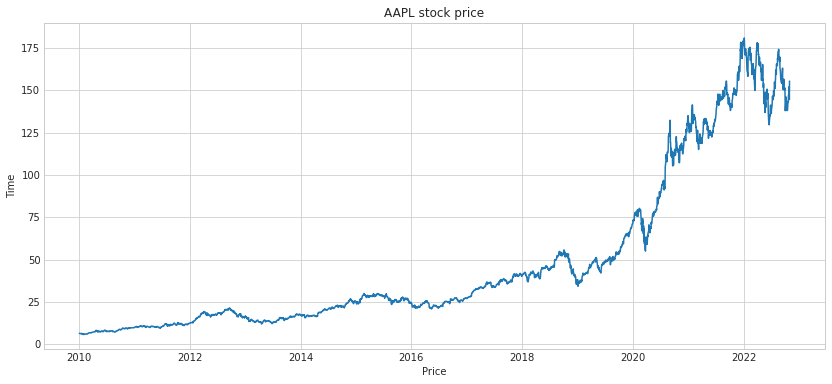

In [ ]:
with plt.style.context('seaborn-whitegrid'):
  fig=plt.figure(figsize=(14,6))
  plt.plot(apple.index,apple['Adj Close'])
  plt.xlabel('Price')
  plt.ylabel('Time')
  #plt.ylim(0,25)
  plt.title('AAPL stock price')

In [ ]:
test = apple.copy()
test = test.reset_index()
test['log_Price'] = np.log(test['Adj Close'])
test['log_price_change'] = test['log_Price'].pct_change()
test['log return'] = np.log(test['Close']/test['Close'].shift(1))

test['Week'] = pd.to_datetime(test['Date']).dt.to_period(freq='W-SUN') 

#test['Month'] = test['Month'].astype('datetime64[ns]') 
#test['Month'] = test['Month'].to_timestamp()

test = test.dropna()
test.head()

mu = np.mean(test['log_price_change'])
std = np.std(test['log_price_change'])
lower = mu-std
upper = mu+std

print('Mean Value: ', mu,'\n')
print('Standard Diviation : ', mu,'\n')
print('Two sigma boundary between {} and {}'.format(lower,upper))

,Date,Open,High,Low,Close,Adj Close,Volume,log_Price,log_price_change,log return,Week
1,2010-01-05,7.664286,7.699643,7.616071,7.656429,6.526477,601904800,1.875867,0.000922,0.001727,2010-01-04/2010-01-10
2,2010-01-06,7.656429,7.686786,7.526786,7.534643,6.422665,552160000,1.859833,-0.008548,-0.016034,2010-01-04/2010-01-10
3,2010-01-07,7.562500,7.571429,7.466071,7.520714,6.410792,477131200,1.857983,-0.000995,-0.001850,2010-01-04/2010-01-10
4,2010-01-08,7.510714,7.571429,7.466429,7.570714,6.453411,447610800,1.864609,0.003566,0.006626,2010-01-04/2010-01-10
5,2010-01-11,7.600000,7.607143,7.444643,7.503929,6.396484,462229600,1.855748,-0.004752,-0.008861,2010-01-11/2010-01-17


Mean Value:  0.0003224177494241433 

Standard Diviation :  0.0003224177494241433 

Two sigma boundary between -0.005245432027084364 and 0.005890267525932651


Text(0.5, 1.0, 'AAPL stock price change')

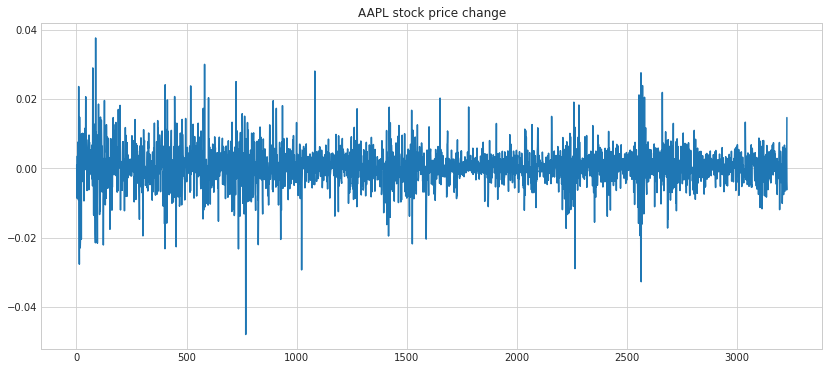

In [ ]:
with plt.style.context('seaborn-whitegrid'):
  fig=plt.figure(figsize=(14,6))
  plt.plot(test.index,test['log_price_change'])
  #plt.ylim(0,25)
  plt.title('AAPL stock price change')

In [ ]:
daily_df = test.merge(news,how='inner',left_on='Date',right_on='first_created_DAY')

In [ ]:
daily_df = daily_df[['log_price_change','Score']]

In [ ]:
daily_df

,log_price_change,Score
0,0.000922,0.049487
1,0.000922,0.049512
2,0.000922,-0.004304
3,0.000922,-0.074800
4,0.000922,0.000000
...,...,...
60942,-0.006152,-0.062012
60943,-0.006152,-0.395023
60944,-0.006152,0.136836
60945,-0.006152,0.004799


In [ ]:
df_econo = daily_df[['log_price_change','Score']]

n_obs = 10
df_train, df_test = df_econo[0:-n_obs], df_econo[-n_obs:]

from statsmodels.tsa.stattools import adfuller

def adf_test(df):
    result = adfuller(df.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

print('the Null Hypothesis (H0): Series data is not stationary')
print('the Alternative Hypothesis (H1): Series data is stationary\n')
        
print('ADF Test: log_price_change time series')
adf_test(df_train['log_price_change'])

print('ADF Test: Sentiment Score time series')
adf_test(df_train['Score'])

the Null Hypothesis (H0): Series data is not stationary
the Alternative Hypothesis (H1): Series data is stationary

ADF Test: log_price_change time series
ADF Statistics: -21.444399
p-value: 0.000000
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567
ADF Test: Sentiment Score time series
ADF Statistics: -28.154180
p-value: 0.000000
Critical values:
	1%: -3.430
	5%: -2.862
	10%: -2.567


In [ ]:
df_train['Score_diff'] = df_train['Score'].diff().dropna()
df_train.dropna(inplace=True)

<ipython-input-31-bbc0b56fa940>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Score_diff'] = df_train['Score'].diff().dropna()
/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

maxlag=20
test = 'ssr_chi2test'

def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
   
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            #min_p_value_index = p_values.index(min_p_value)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    #print(min_p_value_index)
    return df

grangers_causation_matrix(df_train, variables = df_train.columns)

,log_price_change_x,Score_x,Score_diff_x
log_price_change_y,1.0,0.0134,0.2653
Score_y,0.0,1.0000,0.0000
Score_diff_y,0.0,0.0000,1.0000


In [ ]:
grangercausalitytests(df_train[['log_price_change','Score']], maxlag=15)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=5.3962  , p=0.0202  , df_denom=60932, df_num=1
ssr based chi2 test:   chi2=5.3965  , p=0.0202  , df=1
likelihood ratio test: chi2=5.3962  , p=0.0202  , df=1
parameter F test:         F=5.3962  , p=0.0202  , df_denom=60932, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.6217  , p=0.0267  , df_denom=60929, df_num=2
ssr based chi2 test:   chi2=7.2440  , p=0.0267  , df=2
likelihood ratio test: chi2=7.2436  , p=0.0267  , df=2
parameter F test:         F=3.6217  , p=0.0267  , df_denom=60929, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=3.5681  , p=0.0134  , df_denom=60926, df_num=3
ssr based chi2 test:   chi2=10.7056 , p=0.0134  , df=3
likelihood ratio test: chi2=10.7047 , p=0.0134  , df=3
parameter F test:         F=3.5681  , p=0.0134  , df_denom=60926, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.7401  

{1: ({'ssr_ftest': (5.396197635752729, 0.02018394666681654, 60932.0, 1),
   'ssr_chi2test': (5.396463318692846, 0.02017759940069741, 1),
   'lrtest': (5.3962243747664616, 0.020180362236513066, 1),
   'params_ftest': (5.396197635759529, 0.02018394666674018, 60932.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.621694281818638, 0.02674309363277627, 60929.0, 2),
   'ssr_chi2test': (7.243982975868203, 0.026729392190692914, 2),
   'lrtest': (7.243552418774925, 0.026735147074825584, 2),
   'params_ftest': (3.621694281818303, 0.02674309363277627, 60929.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.568131142746492, 0.013441861945406901, 60926.0, 3),
   'ssr_chi2test': (10.705623293223189, 0.013428986515912716, 3),
   'lrtest': (10.704682941082865, 0.013434799545919609, 3),
   'params_ftest': (3.568131142746431, 0.013441861945406901, 60926.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

In [ ]:
p_values = []
for i in range(15):
  k = g[i+1][0]['ssr_chi2test'][1]
  p_values.append(k)

In [ ]:
p_values

[0.02017759940069741,
 0.026729392190692914,
 0.013428986515912716,
 0.02699271872969947,
 0.05067647048931674,
 0.08325987495055916,
 0.10757287978643672,
 0.09229951868547359,
 0.09559954722380241,
 0.1380822512427295,
 0.19129246789420717,
 0.18105502605851856,
 0.23630329982649,
 0.3284946604546256,
 0.38253147402403165]

<Figure size 720x360 with 0 Axes>

<BarContainer object of 15 artists>

Text(0.5, 1.0, 'p-value and lag times')

Text(0.5, 0, 'Number of day lag')

Text(0, 0.5, 'p-value')

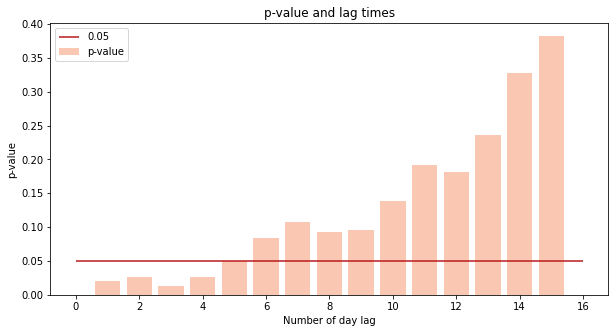

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(range(1,16),p_values, color='#FAC7B3',label='p-value')
plt.hlines(0.05, 0, 16, color='#B9181A',label='0.05')
plt.title('p-value and lag times')
plt.xlabel('Number of day lag')
plt.ylabel('p-value')
plt.legend()
#plt.plot(range(len(p_values)),[])

In [ ]:
g

{1: ({'ssr_ftest': (5.396197635752729, 0.02018394666681654, 60932.0, 1),
   'ssr_chi2test': (5.396463318692846, 0.02017759940069741, 1),
   'lrtest': (5.3962243747664616, 0.020180362236513066, 1),
   'params_ftest': (5.396197635759529, 0.02018394666674018, 60932.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.621694281818638, 0.02674309363277627, 60929.0, 2),
   'ssr_chi2test': (7.243982975868203, 0.026729392190692914, 2),
   'lrtest': (7.243552418774925, 0.026735147074825584, 2),
   'params_ftest': (3.621694281818303, 0.02674309363277627, 60929.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (3.568131142746492, 0.013441861945406901, 60926.0, 3),
   'ssr_chi2test': (10.705623293223189, 0.013428986515912716, 3),
   'lrtest': (10.704682941082865, 0.013434799545919609, 3),
   'params_ftest': (3.568131142746431, 0.013441861945406901, 60926.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
 

In [ ]:
type(g)

dict

In [ ]:
g{0}

SyntaxError: ignored

In [ ]:
df = test

In [ ]:
#df = df.set_index('Date')
dfr = df[['log_price_change','Week']].copy()

TypeError: ignored

In [ ]:
def RV(x):
    return np.sqrt(np.sum(x**2))

dfrv = dfr.groupby(by='Week').apply(RV)

In [ ]:
dfrv

In [ ]:
def RV(x):
    return np.sqrt(np.sum(x**2))

df.set_index()

df['log return'] = np.log(df['Close']/df['Close'].shift(1))
dfr = df.loc[:,'log return'].copy()

# 按照五日周期计算RV
dfrv=dfr.groupby(pd.Grouper(freq='5d')).apply(RV)
dfrv.rename(columns={'log return':'realized volatility'}, inplace=True)

# 画图
fig, ax = plt.subplots(2, 1, sharex=True)
ax[0].plot(dfr)
ax[1].plot(dfrv)

In [ ]:
jumps = []

for i in range(test.shape[0]):
    if test['log_price_change'].iloc[i] < upper and test['log_price_change'].iloc[i] > lower:
      jumps.append(0)
    else:
      jumps.append(1)
sum(jumps)/test.shape[0]
test['Number_of_Jumps'] = jumps
test.head(5)

In [ ]:
test = test.groupby(by='Week').agg(sum)

In [ ]:
test.merge(dfrv,how='inner',on='Week')

In [ ]:
test_NLP = test_news[['Score','Week']]
test_NLP = test_NLP.groupby(by='Week').agg(np.mean)

In [ ]:
combined_df = test.merge(test_NLP,how='inner',on='Week')

In [ ]:
combined_df

In [ ]:
combined_df.to_csv('combined_df.csv')
!cp combined_df.csv "drive/My Drive/"

In [ ]:
test_news = news.copy()
test_news = test_news.reset_index()
test_news['Week'] = pd.to_datetime(test_news['first_created_DAY']).dt.to_period(freq='W-SUN') 

#test['Month'] = test['Month'].astype('datetime64[ns]') 
#test['Month'] = test['Month'].to_timestamp()

test_news.head()

In [ ]:
plt.scatter(test['Date'],test['log_price_change'])

In [ ]:
sid = SentimentIntensityAnalyzer()

sentiment = sid.polarity_scores(df['headline'][-4])
sentiment

In [ ]:
df.to_csv('FE800.csv')
!cp FE800.csv "drive/My Drive/"